## Setup

In [10]:
from dataclasses import dataclass
import plotly.express as px

import torch
from transformer_lens import HookedTransformer
import connectome.core as core
from connectome.interventions import ZeroPattern, CorruptIntervention
from connectome.strategies import (
    BasicStrategy, 
    BisectStrategy,
    BacktrackingStrategy,
    BacktrackBisectStrategy,
)
from connectome.plotting import attn_connectome, plot_graphviz_connectome
from connectome.metrics import logit_diff_metric

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
model = HookedTransformer.from_pretrained("attn-only-4l")

Loaded pretrained model attn-only-4l into HookedTransformer


# Experiments

In [4]:
threshold = 0.3
prompt = '''def port(self, load, size, file, last):
    """oil column piece

    :param load: crime population
    :param size: unit dark
    :param'''
corrupt_prompt = (
    prompt.replace("load", "banana")
    .replace("size", "apple")
    .replace("file", "pear")
    .replace("last", "orange")
)

Baseline strength: 5.41


Exploring:   0%|          | 0/630 [00:00<?, ? connexions/s]

## Comparing Optimization Strategies - Zero Pattern Intervention

### Basic Strategy (most exact but also most expensive)

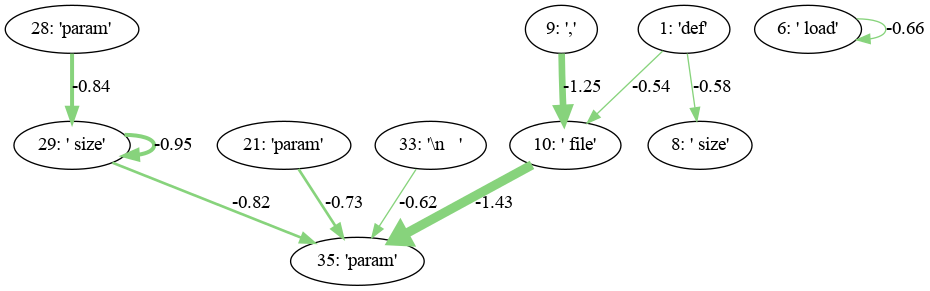

In [5]:
c = core.connectome(
    model,
    prompt,
    logit_diff_metric(model, " file", " self", " load", " size", " last"),
    ZeroPattern(),
    BasicStrategy(),
)
p = plot_graphviz_connectome(model, prompt, c, top_k=10)

### Backtracking

Baseline strength: 5.41


Exploring: 0 connexions [00:00, ? connexions/s]

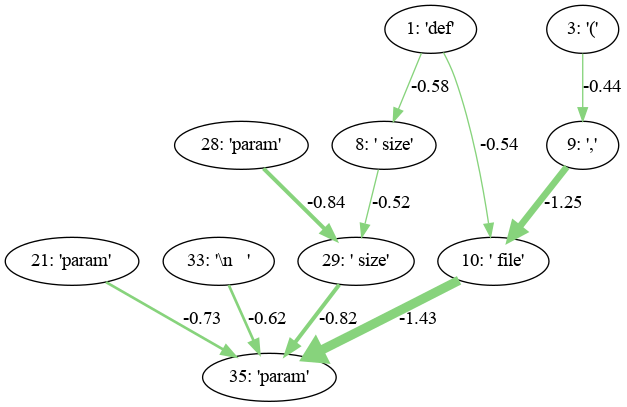

In [11]:
c = core.connectome(
    model,
    prompt,
    logit_diff_metric(model, " file", " self", " load", " size", " last"),
    ZeroPattern(),
    BacktrackingStrategy(threshold),
)
p = plot_graphviz_connectome(model, prompt, c, top_k=10)

### Bisecting

Baseline strength: 5.41


Exploring: 0 connexions [00:00, ? connexions/s]

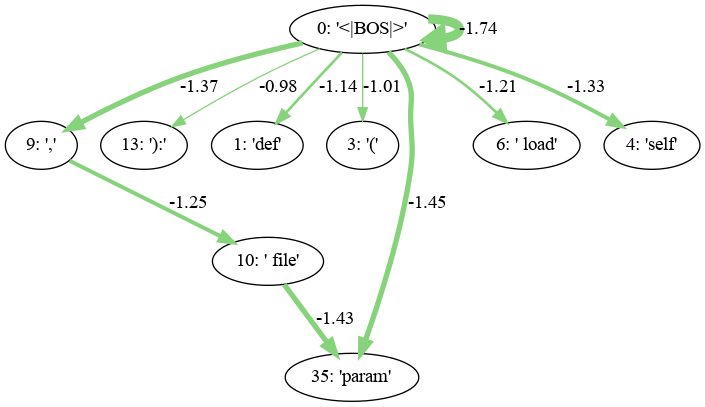

In [8]:
c = core.connectome(
    model,
    prompt,
    logit_diff_metric(model, " file", " self", " load", " size", " last"),
    ZeroPattern(),
    BisectStrategy(threshold),
)
p = plot_graphviz_connectome(model, prompt, c, top_k=10)

### Backtrack-Bisecting

Baseline strength: 5.41


Exploring: 0 connexions [00:00, ? connexions/s]

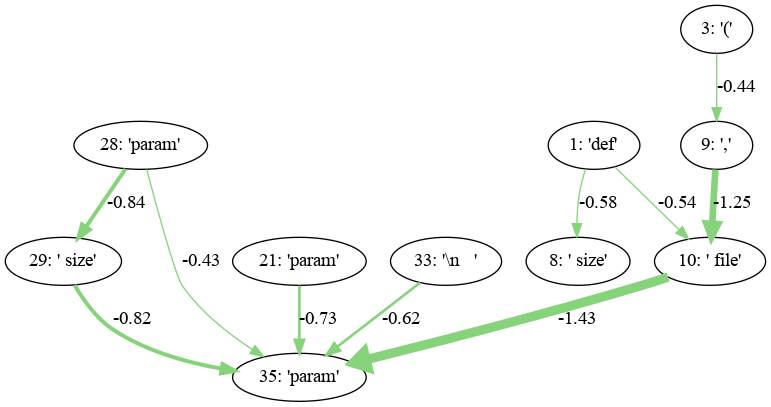

In [12]:
c = core.connectome(
    model,
    prompt,
    logit_diff_metric(model, " file", " self", " load", " size", " last"),
    ZeroPattern(),
    BacktrackBisectStrategy(threshold),
)
p = plot_graphviz_connectome(model, prompt, c, top_k=10)

## Comparing Optimization Strategies - Corruption Intervention

### Basic Strategy

Baseline strength: 5.41


/home/felix/Repositories/connectome/connectome/interventions.py:126: UserWarning: The model does not use split qkv input. Setting it to True.
  warnings.warn("The model does not use split qkv input. Setting it to True.")


Exploring:   0%|          | 0/630 [00:00<?, ? connexions/s]

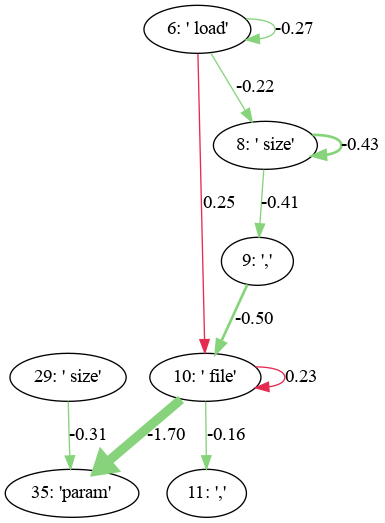

In [13]:
c = core.connectome(
    model,
    prompt,
    logit_diff_metric(model, " file", " self", " load", " size", " last"),
    CorruptIntervention(model, prompt, corrupt_prompt),
    BasicStrategy(),
)
p = plot_graphviz_connectome(model, prompt, c, top_k=10)

### Backtracking

Baseline strength: 5.41


Exploring: 0 connexions [00:00, ? connexions/s]

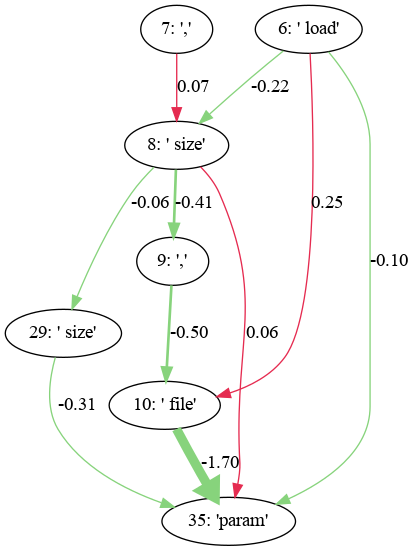

In [14]:
c = core.connectome(
    model,
    prompt,
    logit_diff_metric(model, " file", " self", " load", " size", " last"),
    CorruptIntervention(model, prompt, corrupt_prompt),
    BacktrackingStrategy(threshold),
)
p = plot_graphviz_connectome(model, prompt, c, top_k=10)

### Bisecting

Baseline strength: 5.41


Exploring: 0 connexions [00:00, ? connexions/s]

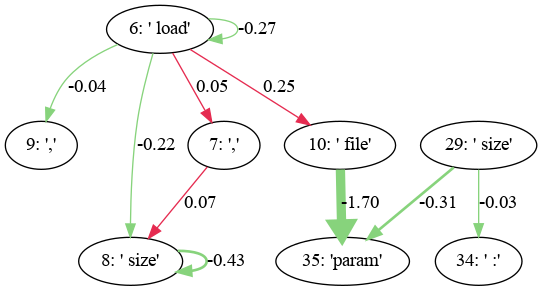

In [18]:
c = core.connectome(
    model,
    prompt,
    logit_diff_metric(model, " file", " self", " load", " size", " last"),
    CorruptIntervention(model, prompt, corrupt_prompt),
    BisectStrategy(0.1),
)
p = plot_graphviz_connectome(model, prompt, c, top_k=10)

### Backtrack-Bisecting

Baseline strength: 5.41


Exploring: 0 connexions [00:00, ? connexions/s]

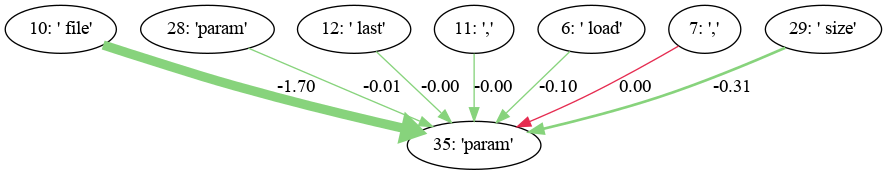

In [17]:
c = core.connectome(
    model,
    prompt,
    logit_diff_metric(model, " file", " self", " load", " size", " last"),
    CorruptIntervention(model, prompt, corrupt_prompt),
    BacktrackBisectStrategy(0.1),
)
p = plot_graphviz_connectome(model, prompt, c, top_k=10)